In [12]:
import numpy as np
import cv2
import imutils
import os
import matplotlib.pyplot as plt

import skimage
import skimage.io

from skimage.filters import threshold_otsu
from skimage.color import rgb2gray

from skimage.morphology import remove_small_objects, binary_closing, square, dilation, erosion, opening, closing, diameter_opening

In [13]:
FILES = !ls inputs/*

In [14]:
FILES

['inputs/Atlas_de_Jacoubet_-_04._Partie_de_la_commune_de_Clichy_et_de_ses_environs_-_BHVP.jpg',
 'inputs/Atlas_de_Jacoubet_-_05._Partie_de_la_commune_de_Montmartre_et_de_ses_environs_-_BHVP.jpg',
 'inputs/Atlas_de_Jacoubet_-_06._Partie_de_la_commune_de_La_Chapelle_et_de_ses_environs_-_BHVP.jpg',
 'inputs/Atlas_de_Jacoubet_-_07._Barrire_de_la_Villette_et_ses_environs_-_BHVP.jpg',
 'inputs/Atlas_de_Jacoubet_-_11._Hospice_Beaujon_et_ses_environs_-_BHVP.jpg']

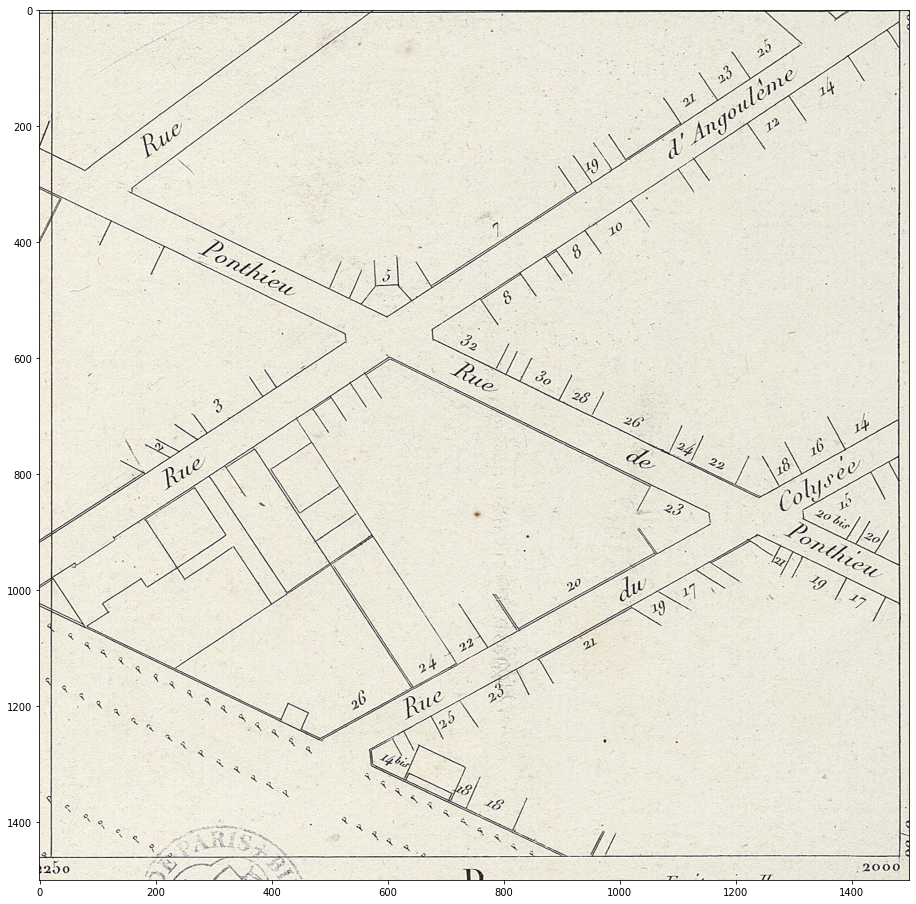

In [62]:
#image = skimage.io.imread(FILES[-1])
image = skimage.io.imread(FILES[-1])[6200:7700, 4600: 6100, :]
# image = skimage.io.imread(FILES[2])[4000:5000, 2000:3000, :]

plt.figure(figsize=(16,16))
imgplot = plt.imshow(image,  cmap=plt.cm.gray)

In [63]:
denoised = rgb2gray(cv2.fastNlMeansDenoising(image))

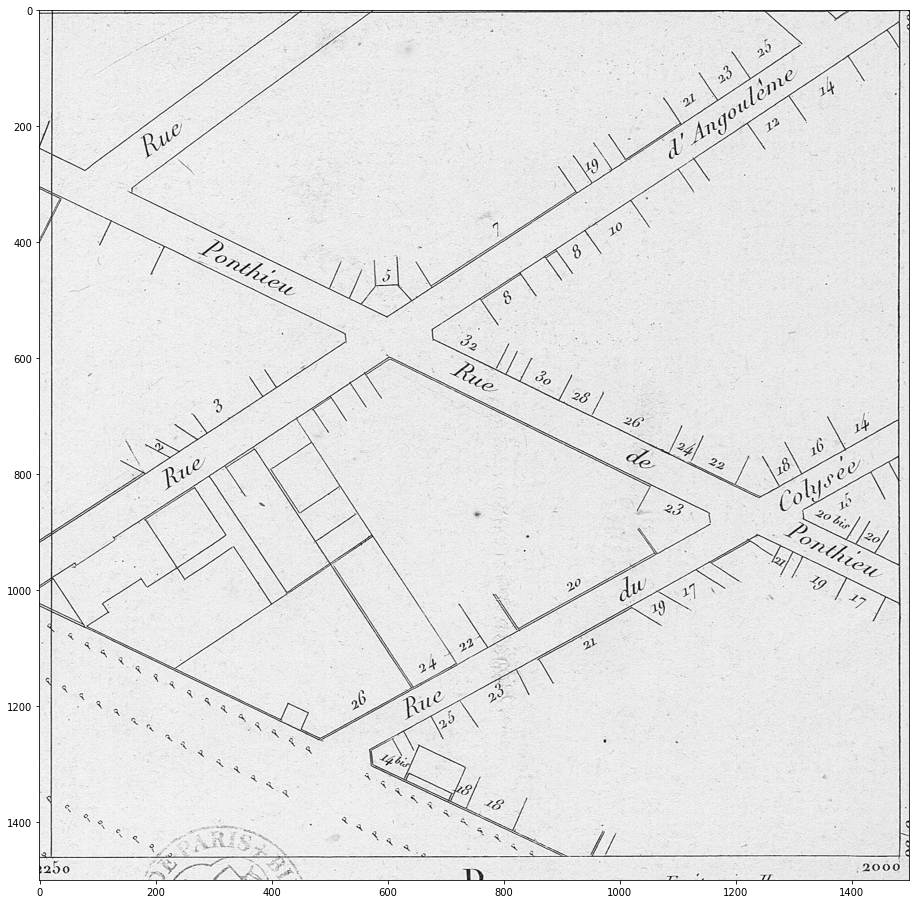

In [64]:
plt.figure(figsize=(16,16))
imgplot = plt.imshow(denoised,  cmap=plt.cm.gray)

In [65]:
from skimage.filters import threshold_otsu
from skimage.color import rgb2gray

gray = 1 - denoised

gray2 = opening(gray, square(4))

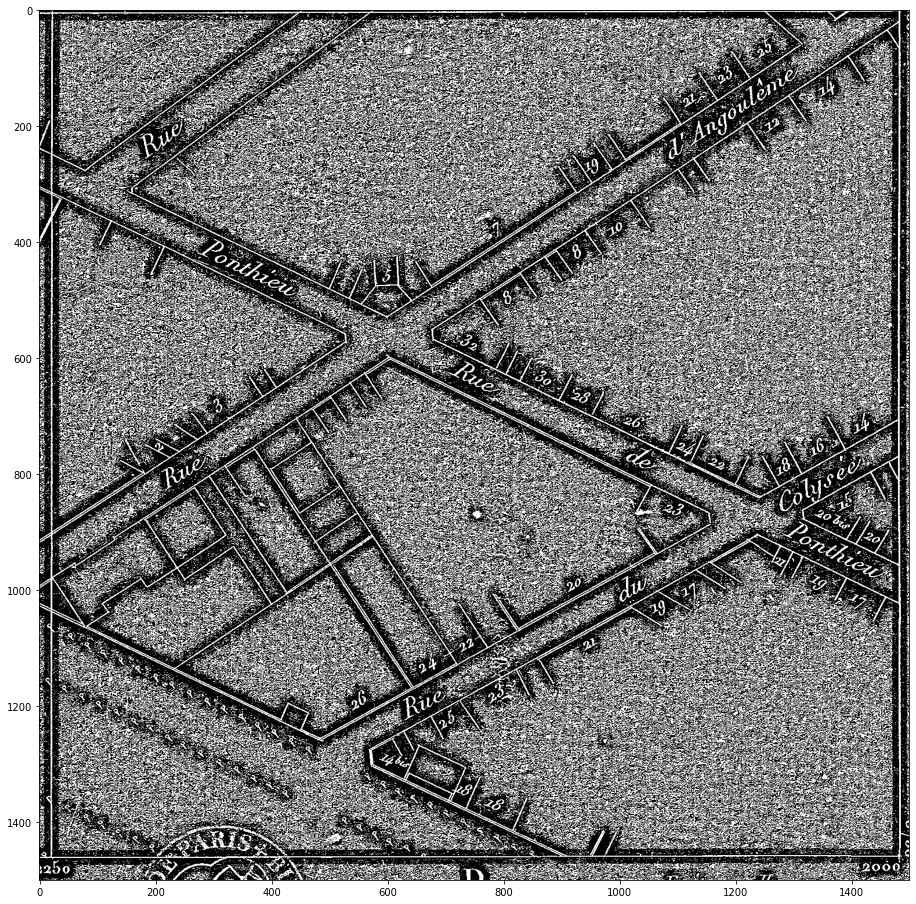

In [87]:
from skimage.filters import threshold_sauvola, inverse
from skimage.color import rgb2gray

gray = 1 - denoised

threshold = threshold_sauvola(gray, window_size=25, k=0.05)
binary = gray > threshold
# binary = binary_closing(binary)
#binary = binary_closing(binary, square(3))

plt.figure(figsize=(16,16))
imgplot = plt.imshow(binary,  cmap=plt.cm.gray)
#threshold

In [88]:
#binary = binary_closing(binary, square(3))
small = (remove_small_objects(binary, 50) * 255) - (remove_small_objects(binary, 400) * 255)

In [89]:
from skimage.measure import label
from skimage.measure import regionprops

label_image = label(small)
images = []

for i, region in enumerate(regionprops(label_image)):
    bbox = region.bbox
    ratio = region.minor_axis_length / region.major_axis_length

    if ratio < 0.25:
        small[label_image == i + 1] = 0
        continue

    total_count = denoised[label_image == i + 1].shape[0]
    black_count = np.sum(((denoised[label_image == i + 1]) <= 0.5))# - total_count / 3

    print(black_count, total_count)
    if black_count / total_count < 0.3:
        small[label_image == i + 1] = 0
        continue

    images.append(binary[bbox[0]:bbox[2],bbox[1]:bbox[3]])

0 1295
0 75
0 287
0 624
0 66
0 218
1 479
0 413
0 323
0 2596
0 575
0 188
0 201
2 725
0 467
0 72
0 1019
0 78
0 166
0 51
0 139
0 1034
0 94
0 712
0 51
0 60
0 50
0 151
0 168
0 974
0 93
0 599
4 1189
0 64
0 52
0 120
0 488
0 216
0 51
0 65
0 523
0 68
0 108
49 122
0 126
0 510
0 246
0 218
0 170
0 241
0 106
0 91
0 137
0 334
0 73
0 67
47 91
0 375
0 126
0 102
0 948
0 266
0 382
0 240
0 74
0 183
0 70
0 121
0 453
0 136
0 127
0 66
0 268
0 322
0 61
0 98
0 50
0 59
0 1558
0 329
0 158
0 1262
86 124
0 91
0 61
0 184
133 223
0 76
0 389
0 82
0 192
0 70
0 185
30 52
0 107
95 167
0 95
35 63
0 53
0 250
0 89
0 625
0 59
0 64
0 51
51 64
0 719
61 80
0 1180
0 85
0 145
39 81
0 421
0 133
0 437
0 129
0 53
0 237
0 1984
0 50
0 62
46 86
0 93
0 87
92 169
0 263
0 57
0 825
0 186
0 124
0 68
53 71
0 639
0 68
0 86
0 71
0 149
0 411
46 74
1 435
0 2485
0 183
0 230
0 54
91 126
0 93
0 138
0 78
0 462
0 59
0 76
0 64
0 61
124 184
0 576
0 95
0 941
0 77
0 82
43 57
0 138
102 171
0 111
0 76
0 94
150 241
0 587
109 151
0 206
0 956
0 89
0 373
0 3

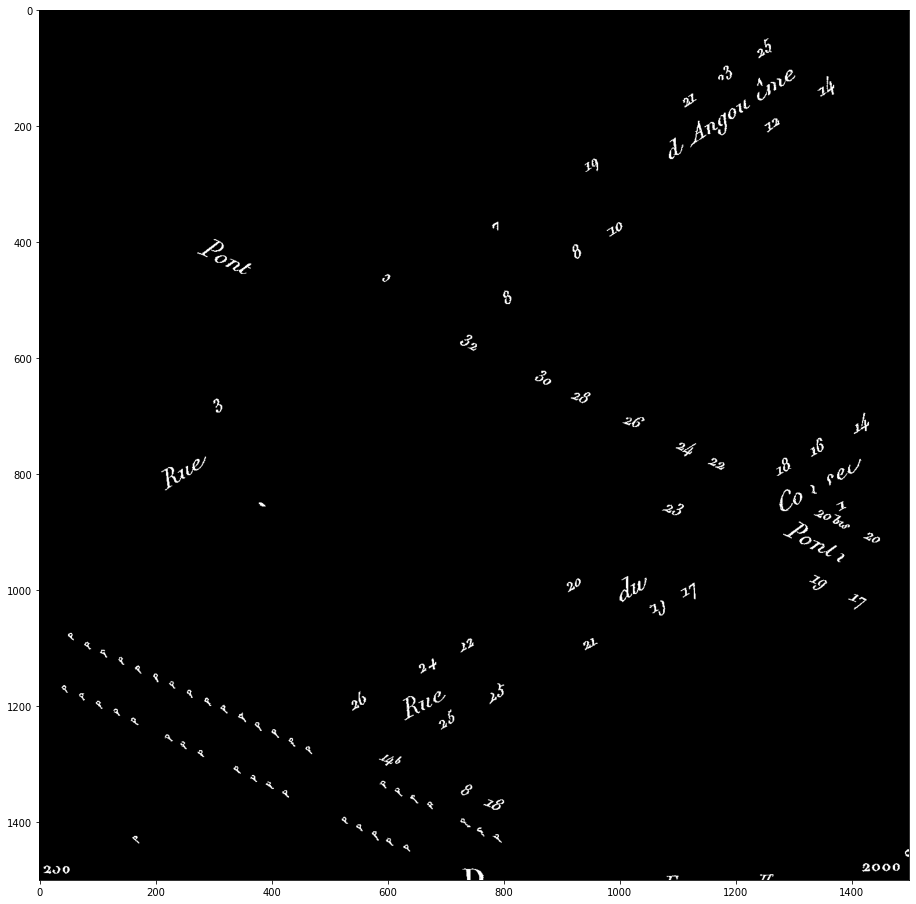

In [90]:
small_copy = np.array(small, copy=True)
# small_copy[binary == 1] = 1
plt.figure(figsize=(16,16))
imgplot = plt.imshow(small_copy,  cmap=plt.cm.gray)

In [104]:
skimage.io.imsave("small.png", small)
skimage.io.imsave("binary.png", binary)
skimage.io.imsave("gray.png", gray)

<ipython-input-104-ffdaa8767df1>:1: UserWarning: small.png is a low contrast image
  skimage.io.imsave("small.png", small)
Lossy conversion from int64 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.
<ipython-input-104-ffdaa8767df1>:2: UserWarning: binary.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  skimage.io.imsave("binary.png", binary)
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


255


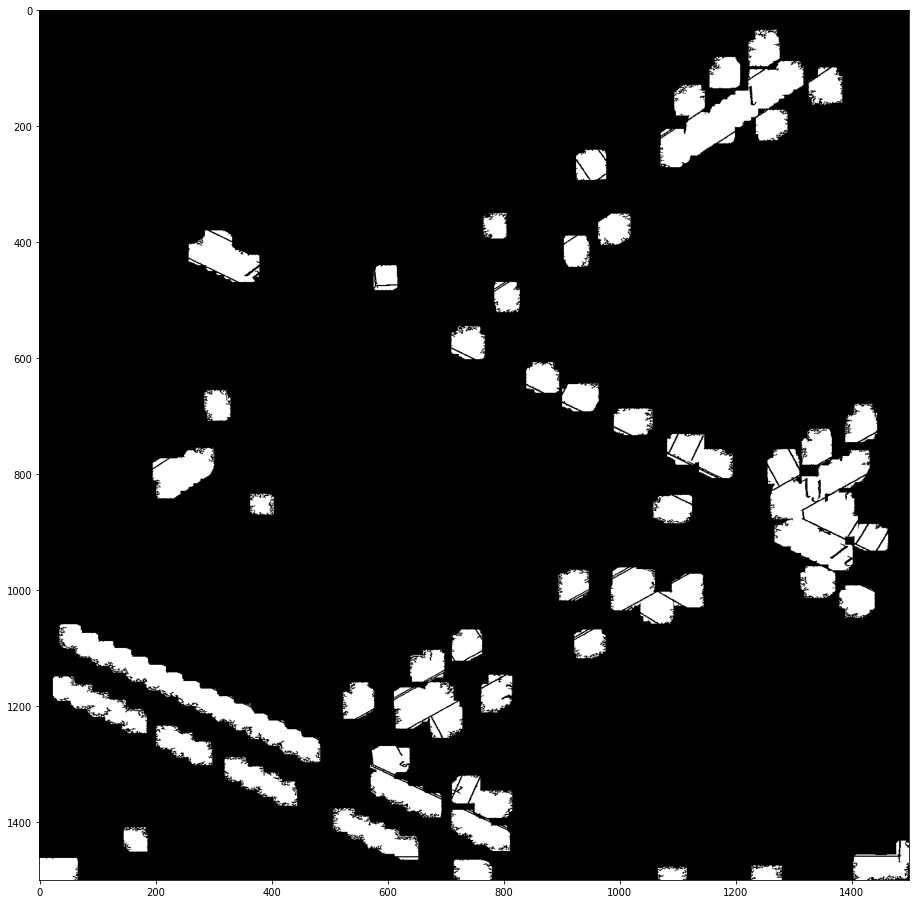

In [170]:
from skimage.morphology import *

closed_small = dilation(small, square(30))

im = (binary*255 - small) > 0
closed_small[im > 0] = False
closed_small = closed_small > 0
closed_small = remove_small_holes(closed_small)

print(np.max(small))
plt.figure(figsize=(16,16))
imgplot = plt.imshow(closed_small,  cmap=plt.cm.gray)

In [171]:
label_image = label(closed_small)
images = []

for i, region in enumerate(regionprops(label_image)):
    bbox = region.bbox
    print(region.minor_axis_length, region.major_axis_length)
    
    ratio = region.minor_axis_length / region.major_axis_length

    if ratio < 0.25:
        closed_small[label_image == i + 1] = 0
        continue

    total_count = denoised[label_image == i + 1].shape[0]
    black_count = np.sum(((denoised[label_image == i + 1]) <= 0.5))# - total_count / 3

    #print(black_count, total_count)
    if black_count / total_count < 0.3:
        closed_small[label_image == i + 1] = 0
        continue

    images.append(binary[bbox[0]:bbox[2],bbox[1]:bbox[3]])

52.97331396400245 65.82362755519351
2.649521467893269 12.310182355448301
0.0 3.265986323710904
1.7888543819998317 3.098386676965933
0.0 0.0


ZeroDivisionError: float division by zero

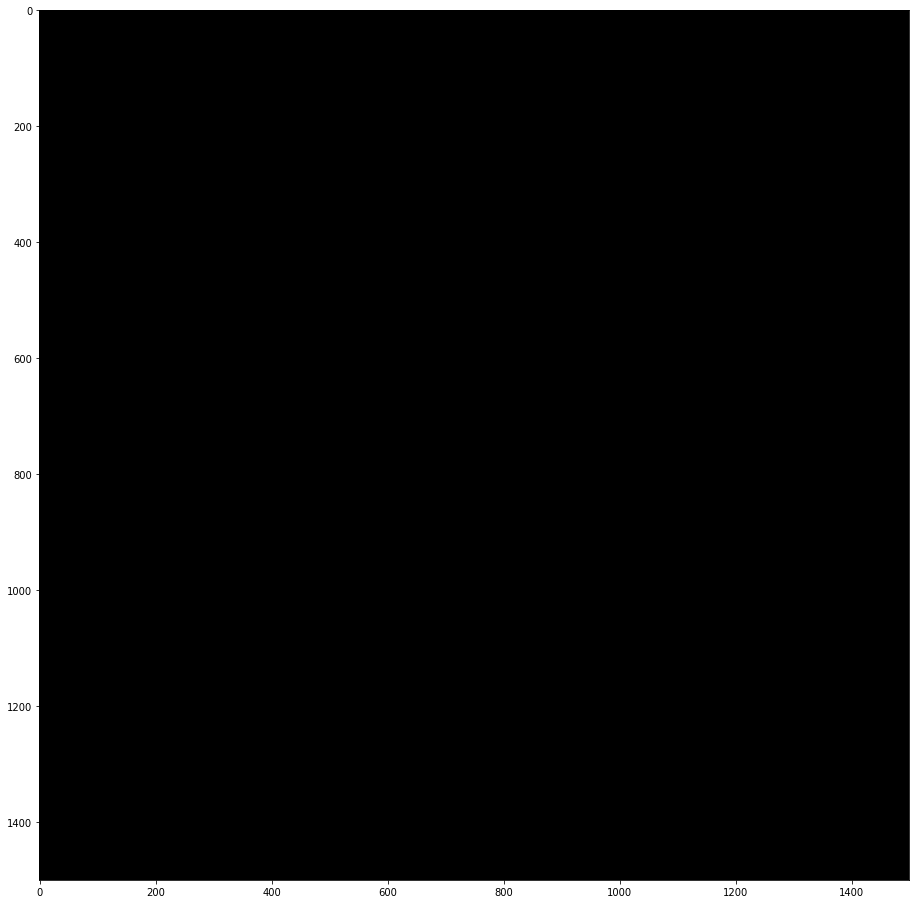

In [162]:
small_copy = np.array(closed_small, copy=True)
# small_copy[binary == 1] = 1
plt.figure(figsize=(16,16))
imgplot = plt.imshow(small_copy,  cmap=plt.cm.gray)